In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk

# Load Data

In [53]:
df = pd.read_csv('spam_or_not_spam.csv')
df.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [54]:
# count value distribution
value_count = df['label'].value_counts()
value_count

label
0    2500
1     500
Name: count, dtype: int64

<BarContainer object of 2 artists>

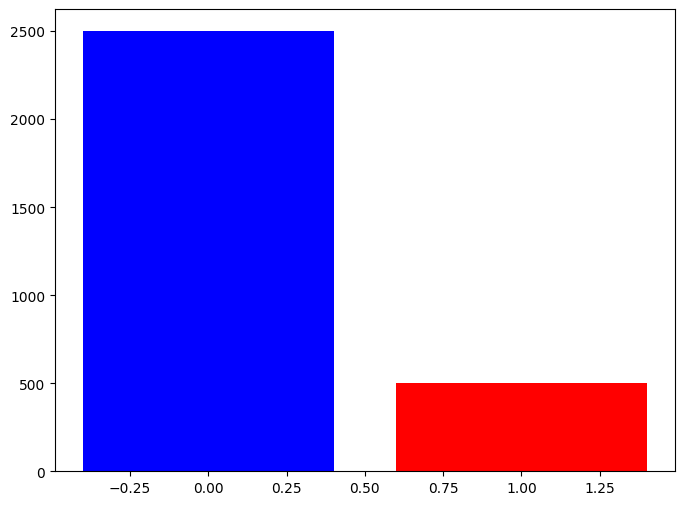

In [55]:
# plot data 
plt.figure(figsize=(8,6))
plt.bar(value_count.index, value_count.values, color=['blue', 'red'])

# Data Cleaning

In [56]:
#drop rows with missing values
df = df.dropna()
#print new shape of data frame
print('new data frame shape:', df.shape)

new data frame shape: (2999, 2)


In [57]:
# find null value with withe space
blanks = [] 
for i, email, label in df.itertuples(): 
    if email.isspace(): #find if is a white space
        blanks.append(i) # if is blank add the row number to list
print(len(blanks), '    |    ', 'blanks:  ',blanks)

2     |     blanks:   [2806, 2828]


In [58]:
# show blanks data
df.iloc[blanks] 

,email,label
2806,,1
2828,,1


In [59]:
# drop null value
df.drop(blanks, inplace=True)
print('new data frame shape:', df.shape)

new data frame shape: (2997, 2)


# Conver Data to Bag of Words

In [60]:
# load nltk stop word 
from nltk.corpus import stopwords 
nltk.download('stopwords')
# load nltk lemmatizer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')`a

sw = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/naeimiz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/naeimiz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [76]:
print('stop words length:',len(sw))
sw[:10]

stop words length: 179


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [62]:
# split data and lemmatize data and drop stop words
def preprocess_text(messy_string):
    assert(type(messy_string)==str) #check the input is string
    cleaned = ' '.join([lemmatizer.lemmatize(word) for word in messy_string.split() if word not in sw]) 
    return cleaned

In [63]:
# test preprocess_text function
test = 'hello, world this is a messy string test'

clean = preprocess_text(test)
clean


'hello, world messy string test'

In [64]:
# apply preaccuracy_score to data frame 'email' column
df['email'] = df['email'].apply(preprocess_text)
df.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMBE...,0
1,martin posted tasso papadopoulos greek sculpto...,0
2,man threatens explosion moscow thursday august...,0
3,klez virus die already prolific virus ever kle...,0
4,adding cream spaghetti carbonara effect pasta ...,0


In [65]:
# using Tfidf for vectorizing data frame
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['email'])
y = df['label']

## split data for train and test

In [66]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

# Train model 

## Train Logistic Regression Model

In [77]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='lbfgs', max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [68]:
y_ = clf.predict(X_test)

### Evaluate Model

In [69]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_)
print(report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       630
           1       1.00      0.72      0.84       120

    accuracy                           0.96       750
   macro avg       0.98      0.86      0.91       750
weighted avg       0.96      0.96      0.95       750



In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_)

0.956

### visulize confusion matrix

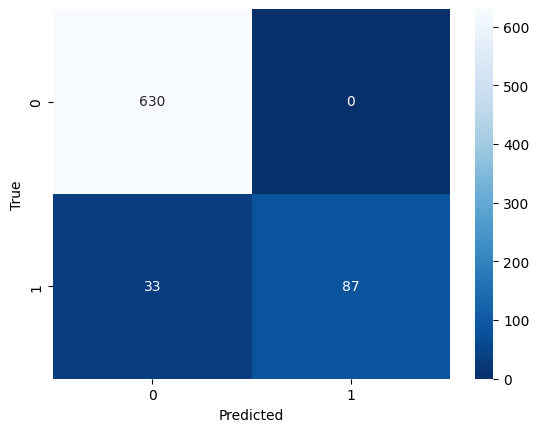

In [71]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
cm = confusion_matrix(y_test, y_)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
sns.heatmap(cm, annot=True, fmt=".0f", cmap = 'Blues_r')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Train SVM Model

In [72]:
from sklearn.svm import SVC 
svm = SVC()
svm.fit(X_train, y_train)

SVC()

### Evaluate Model

In [73]:
y_ = svm.predict(X_test)
report = classification_report(y_test, y_)
print(report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       630
           1       1.00      0.88      0.94       120

    accuracy                           0.98       750
   macro avg       0.99      0.94      0.96       750
weighted avg       0.98      0.98      0.98       750



In [74]:
print('accuracy score',accuracy_score(y_, y_test))

accuracy score 0.9813333333333333


### visulize confusion matrix

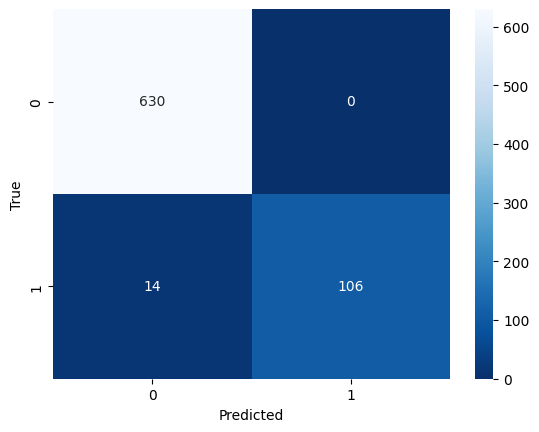

In [75]:
cm = confusion_matrix(y_test, y_)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
sns.heatmap(cm, annot=True, fmt=".0f", cmap = 'Blues_r')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()